<h1>MLTS Exercise 01 - Data Exploration</h1>

### Task:

This notebook provides three time series datasets, each representing daily user counts for separate applications over the year 2020:
* `App_1_Users_2020.csv`
* `App_2_Users_2020.csv`
* `App_3_Users_2020.csv`

For each dataset, complete the following tasks:

* Load the dataset.
* Visualize the data to observe user trends over time.
* Examine the data for any notable characteristics.
* Split the data into training and test sets, with the test set comprising the final three months of 2020.

In subsequent Exercises 02 and 03, these datasets will be utilized to perform Bayesian Linear Regression analysis.

In [4]:
import os

# import packages
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))

In [10]:
df1 = pd.read_csv(os.path.join(BASE_DIR, "00_Datasets/01-03_App_Datasets/App_1_Users_2020.csv"), sep=";")
df2 = pd.read_csv(os.path.join(BASE_DIR, "00_Datasets/01-03_App_Datasets/App_2_Users_2020.csv"), sep=";")
df3 = pd.read_csv(os.path.join(BASE_DIR, "00_Datasets/01-03_App_Datasets/App_3_Users_2020.csv"), sep=";")


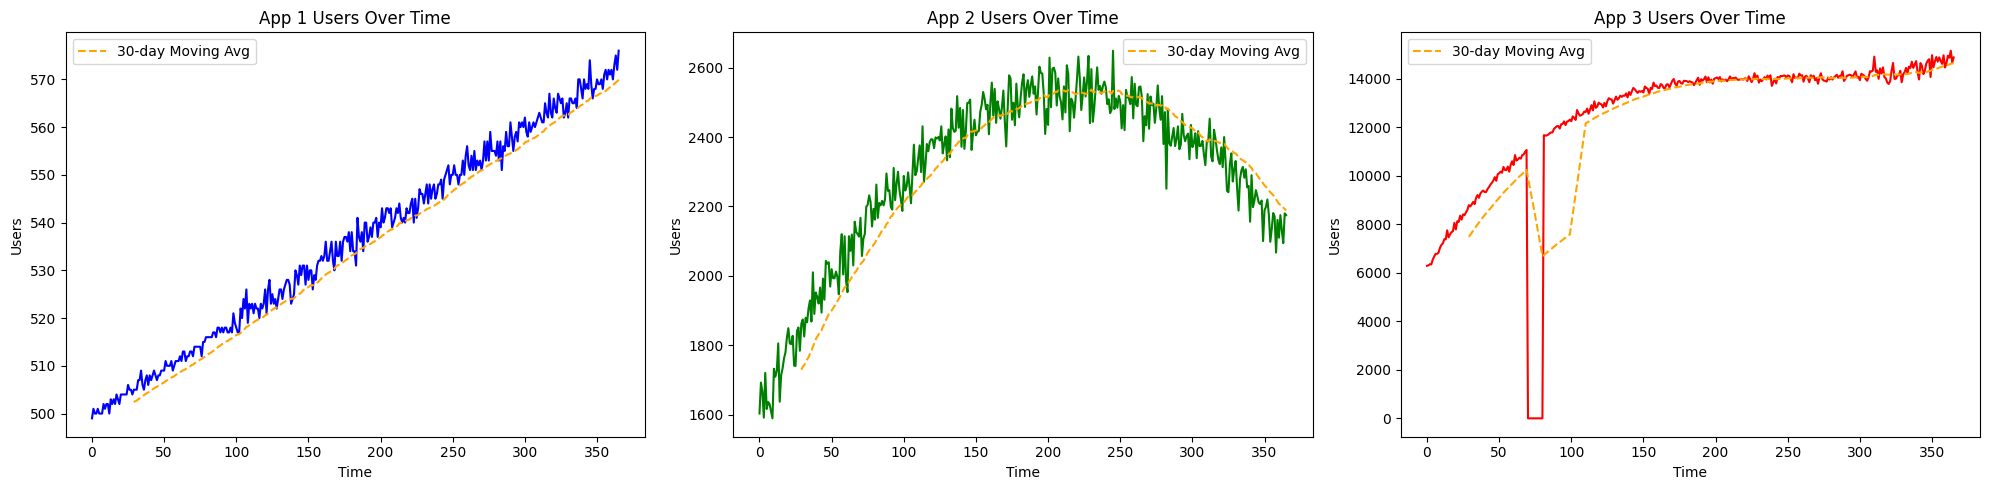

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot for df1
axs[0].plot(df1['time'], df1['users'], color='blue')
axs[0].set_title('App 1 Users Over Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Users')

# Plot for df2
axs[1].plot(df2['time'], df2['users'], color='green')
axs[1].set_title('App 2 Users Over Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Users')

# Plot for df3
axs[2].plot(df3['time'], df3['users'], color='red')
axs[2].set_title('App 3 Users Over Time')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Users')

# Plot moving average for df1
df1['moving_avg'] = df1['users'].rolling(window=30).mean()
axs[0].plot(df1['time'], df1['moving_avg'], color='orange', linestyle='--', label='30-day Moving Avg')
axs[0].legend()

# Plot moving average for df2
df2['moving_avg'] = df2['users'].rolling(window=30).mean()
axs[1].plot(df2['time'], df2['moving_avg'], color='orange', linestyle='--', label='30-day Moving Avg')
axs[1].legend()

# Plot moving average for df3
df3['moving_avg'] = df3['users'].rolling(window=30).mean()
axs[2].plot(df3['time'], df3['moving_avg'], color='orange', linestyle='--', label='30-day Moving Avg')
axs[2].legend()

plt.tight_layout()
plt.show()

## App 1
- linear increase in users
- no irregularities

## App 2
- user count is following an inverse parabola pattern
- no irregularities

## App 3
- user count is following an (almost) logarithmic function
- data seems to be missing from t=70 to t=80

In [26]:
sample_data = df1[["date", "time", "users"]].copy()

sample_data.rename(columns={"users": "app_1_users"}, inplace=True)
sample_data["app_2_users"] = df2["users"]
sample_data["app_3_users"] = df3["users"]
sample_data.head()

,date,time,app_1_users,app_2_users,app_3_users
0,2020-01-01,0,499,1603,6291
1,2020-01-02,1,501,1692,6306
2,2020-01-03,2,500,1666,6358
3,2020-01-04,3,500,1591,6347
4,2020-01-05,4,501,1720,6546


In [29]:
# Convert the 'date' column to datetime format
sample_data['date'] = pd.to_datetime(sample_data['date'])

# Define the cutoff date for the test set
cutoff_date = '2020-10-01'

# Split the data into training and test sets
train_data = sample_data[sample_data['date'] < cutoff_date]
test_data = sample_data[sample_data['date'] >= cutoff_date]

# save the data
train_data.to_csv(os.path.join(BASE_DIR, "00_Datasets/train.csv"), index=False)
test_data.to_csv(os.path.join(BASE_DIR, "00_Datasets/test.csv"), index=False)